# Logistic Regression
![](https://miro.medium.com/max/725/1*Ubge8qVlc4Xk58H1oMp4Zw.jpeg)

**Table of Content**
* Logistic Regression
    * Simple illustration with two variables
    * Training with all variables. ROC curve and AUC.
* Softmax Regression
    * Training with all variables. Confusion matrix.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

import os
print(os.listdir("input/Lecture_04_4/"))

['winequality-red.csv']


In [2]:
# set pyplot parameters to make things pretty
plt.rc('axes', linewidth = 1.5, labelsize = 14)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.rc('xtick.major', size = 3, width = 1.5)
plt.rc('ytick.major', size = 3, width = 1.5)

# Logistic Regression
Logistic regression is used to classify whether an input belong to a class (1) or no (0). <br/>
Given an input sample  $\vec{x}^{(i)}$, the predicted probability of this input belonging to the class is:
<center>
$\hat{p}^{(i)}=\sigma(\vec{\theta}^{T}\cdot \vec{x}^{(i)})=1/(1+e^{-\vec{\theta}^{T}\cdot \vec{x}^{(i)}})$
</center>
The $\sigma (t)$ function is called a sigmoid function. Usually, logistic regression predicts $\hat{y}=1$ if $\hat{p} \geq 0.5$, and $\hat{y}=0$ if $\hat{p} < 0.5$. The <b>decision boundary</b> is given by: $\vec{\theta}^{T}\cdot \vec{x}=0$. <br/>

While training, the cost function is the <b>log loss</b>:
<center>
$J(\theta)=-\frac{1}{m}\sum^{m}_{i=1}[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$
</center>
The partial derivatives of log loss is:
<center>
    $\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum^{m}_{i=1}(\hat{p}^{(i)}-y^{(i)})x_j^{(i)}$
</center>

If you are interested in deriving this yourself, the following trick will come in handy:
<center>
    $\frac{d\sigma(t)}{dt}=d(\frac{1}{1+e^{-t}})/dt=-\frac{1}{(1+e^{-t})^2}d(1+e^{-t})/dt=\frac{e^{-t}}{(1+e^{-t})^2}=\frac{1}{1+e^{-t}}\frac{e^{-t}}{1+e^{-t}}=\sigma(t)\cdot (1-\sigma(t))$
</center>  

![](https://lh5.googleusercontent.com/proxy/pD__H77fXi3C8cbKG9TigbES4h69XGl9RExCZqbMeJ8jV2dMLZsCO4Kf2nRTz46hlxMTD6xnJtl61QmXWCp6GmJPuseR5kxIiQEdfNNzF60mzOYHLTcM)

![](https://www.researchgate.net/profile/Tali_Leibovich-Raveh/publication/325868989/figure/fig2/AS:639475206074368@1529474178211/A-Basic-sigmoid-function-with-two-parameters-c1-and-c2-as-commonly-used-for-subitizing.png)

We will illustrate how logistic regression works in the wine quality dataset first. <br/>
Let's take a look at the dataset:

In [3]:
wineData = pd.read_csv('input/Lecture_04_4/winequality-red.csv')
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wineData.quality.unique() # 3-8

array([5, 6, 7, 4, 8, 3], dtype=int64)

Looks like wine quality in this dataset ranges from 3 to 8. Let's look at the distribution:

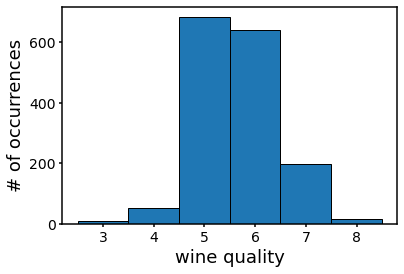

In [5]:
plt.hist(wineData.quality.values,bins=[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5],edgecolor = 'black')
plt.xlabel('wine quality', fontsize = 18)
plt.ylabel('# of occurrences', fontsize = 18)
plt.show()

We define wine as 'good'(1) if its quality is larger than or equal to 7, and 'not good'(0) otherwise.  

In [6]:
wineData['category'] = wineData['quality'] >= 7
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False


Our goal is to run logistic regression to predict which category the wine falls in. <br/>

In [7]:
from sklearn.linear_model import LogisticRegression

## Simple illustration with two variables
Let's start with using only two variables, for the sake of visualization. The prediction outcome is expected to be poor, since these two variables are probablity insufficient to decide wine quality.

In [8]:
X = wineData[['fixed acidity','volatile acidity']].values
y = wineData['category'].values.astype(np.int)

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

# save the standardized data for plotting
dataStan=pd.DataFrame()
dataStan['fixed acidity(stan)']=Xstan[:,0]
dataStan['volatile acidity(stan)']=Xstan[:,1]
dataStan['category']=y
dataStan.head()

,fixed acidity(stan),volatile acidity(stan),category
0,-0.528360,0.961877,0
1,-0.298547,1.967442,0
2,-0.298547,1.297065,0
3,1.654856,-1.384443,0
4,-0.528360,0.961877,0


We chose to standardize the input, since **SciKit-learn**'s LogisticRegression comes with a default L2 regularization.

In [9]:
logReg = LogisticRegression()
logReg.fit(Xstan,y)
logReg.coef_, logReg.intercept_

(array([[ 0.11930949, -1.00023308]]), array([-2.18534787]))

This means $\theta_0=-2.17$, $\theta_1=0.12$, and $\theta_2=-0.99$.  
To predict probablity $\hat{p}$, we have: $\hat{p}=\sigma(\theta_0 + \theta_1 x_1 + \theta_2 x_2)$. <br/>
The following function will output the probability of class 0 (1-$\hat{p}$) and class 1 ($\hat{p}$):

In [10]:
logReg.predict_proba(Xstan)

array([[0.96122702, 0.03877298],
       [0.98506306, 0.01493694],
       [0.97120498, 0.02879502],
       ...,
       [0.90240267, 0.09759733],
       [0.95284354, 0.04715646],
       [0.75532532, 0.24467468]])

The LogisticRegression method automaticlly chooses the class label that has the largest probability as the predicted label. In this simple 2-class prediction, logistic regression predicts $\hat{y}=1$ if $\hat{p} \geq 0.5$, and $\hat{y}=0$ if $\hat{p} < 0.5$.  You can output the predicted labels as follows:

In [11]:
yhat = logReg.predict(Xstan)
dataStan['predict']=yhat
dataStan.head()

,fixed acidity(stan),volatile acidity(stan),category,predict
0,-0.528360,0.961877,0,0
1,-0.298547,1.967442,0,0
2,-0.298547,1.297065,0,0
3,1.654856,-1.384443,0,0
4,-0.528360,0.961877,0,0


Let's plot the descision boundary $\theta^{T}\cdot x=0$ of this predictor:

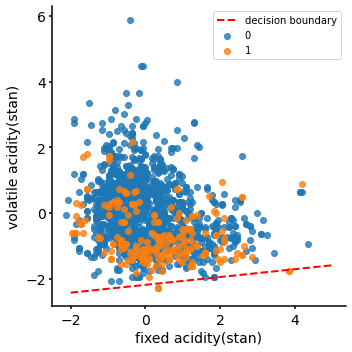

In [12]:
sns.lmplot(x='fixed acidity(stan)',y='volatile acidity(stan)',hue='category',
           data=dataStan, fit_reg=False, legend=False)
x1stan = np.linspace(-2,5,num=50)
theta1 = logReg.coef_[0][0]
theta2 = logReg.coef_[0][1]
theta0 = logReg.intercept_[0]
x2stan = -(theta1*x1stan + theta0)/theta2
plt.plot(x1stan,x2stan,marker='',linestyle='--', color='r',lw=2, label='decision boundary')
plt.legend()
plt.show()

** This is, as expected, a pretty poor fit, since we only chose two variables to train the model**. But this simple illustration should give you a clear idea of what logistic regression does and how decision boundary is decided. Now we will move on to training with all variables. 

##  Training with all variables. ROC curve and AUC.
Now let's get serious and use logistic regression on all variables and see how the model performs.

In [13]:
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False


In [14]:
X = wineData[wineData.columns[0:11]].values
y = wineData['category'].values.astype(np.int)

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

In [15]:
# save the standardized data for plotting
dataStan=pd.DataFrame(data = Xstan, columns = wineData.columns[0:11])
dataStan['category']=y
dataStan.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0


In [16]:
# fit model
logReg = LogisticRegression()
logReg.fit(Xstan,y)
logReg.intercept_, logReg.coef_

(array([-2.79790345]),
 array([[ 0.45433527, -0.46051194,  0.11565533,  0.32620758, -0.40819913,
          0.10529055, -0.52939661, -0.46600014,  0.02520222,  0.62506236,
          0.80462454]]))

How well does the prediction work on the training set? We will calculate several measures here:
* P - # of condition positives
* N - # of condition negatives
* TP - # of true positives
* TN - # of true negatives
* FP - # of false positives
* FN - # of false negatives

**Precision**: TP/(TP + FP), among all the predicted positives, how many are actually positive? <br/>
**True Positve Rate (TPR)/sensitivity**: TP/P, among all the condition positives, how many are predicted positive? <br/>
**Accuracy**: (TP + TN)/(P + N), among all samples, how many were correctly predicted? <br/>
**False Potivie Rate (FPR)**: FP/N, among all the condition negatives, how many were incorrectly predicted as positive? <br/>

For more details, see https://en.wikipedia.org/wiki/Confusion_matrix

![](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)
#  

In [17]:
yhat = logReg.predict(Xstan)
dataStan['predict'] = yhat
dataStan.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category,predict
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0,0


In [18]:
TP = np.sum([(c==1 and p==1) for c,p in zip(dataStan['category'].values,dataStan['predict'].values)])
TN = np.sum([(c==0 and p==0) for c,p in zip(dataStan['category'].values,dataStan['predict'].values)])
FP = np.sum([(c==0 and p==1) for c,p in zip(dataStan['category'].values,dataStan['predict'].values)])
FN = np.sum([(c==1 and p==0) for c,p in zip(dataStan['category'].values,dataStan['predict'].values)])
P = np.sum(dataStan['category'].values)
N = len(dataStan['category'].values) - P

In [19]:
print('Precision is ',TP/(TP + FP))
print('True positive rate is ',TP/P)
print('Accuracy is ', (TP+TN)/(P+N))
print('False positive rate is ', FP/N)

Precision is  0.6324786324786325
True positive rate is  0.34101382488479265
Accuracy is  0.8836772983114447
False positive rate is  0.031114327062228653


* First of all, accuracy is 88.4%, meaning 88.4% of the samples are correctly predicted. 
* False positve rate is 3.1%, meaning most of the condition negatives were correctly predicted. 
* True positive rate is only 34.6%, meaning large proportion of condition positives were misclassified. 
* This did not affect accuracy too much due to the fact that the total number of condition positives (P) is relatively small (217 out of 1599 samples). 
* Precision is 63.6%, meaning among all the predicted positives (118), only 63.6% of them are actually positives.
* Now, all of above are based on a threshold of 0.5, meaning the predictor predicts 1 if $\hat{p} \geq 0.5$. But this threshold can be changed and all of the above measures will change accordingly. We can print out the predicted probability of class one as follows:

In [20]:
phat = logReg.predict_proba(Xstan)[:,1]
print(phat)

[0.00738467 0.00868339 0.01138288 ... 0.11491999 0.03716083 0.19116805]


# Receiver Operating Characteristic (ROC) Curve
![](https://chrisalbon.com/images/machine_learning_flashcards/Receiver_Operating_Characteristic_print.png)
We can vary the decision threshold between [0, 1], and calculate the true positive rate and false positive rate for each threshold. A plot of such (TPR, FPR) pairs is called an **receiver operating characteristic(ROC) curve**. Let's plot this curve for our current predictor:

In [21]:
from sklearn.metrics import roc_curve

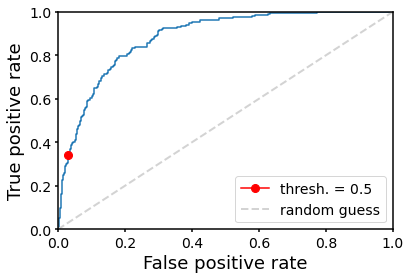

In [22]:
fpr, tpr, thresholds = roc_curve(dataStan['category'].values, phat)
plt.plot(fpr, tpr)
plt.plot(FP/N, TP/P, marker='o', ms = 8, color = 'red', label = 'thresh. = 0.5')
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

Some intuitive understanding of the curve:
* When threshold = 0, all samples are predicted to be positive -> FPR = TPR = 1.
* When threshold = 1, all samples are predicted to be negative -> FPR = TPR = 0.
* Random guess gives the diagonal curve. Models with ROC curve should be above the random guess to be considered good.
* The ideal case would be the top left corner, where FPR = 0, TPR = 1. Therefore the closer the ROC curve to the top left corner, the better.

![](https://images.squarespace-cdn.com/content/v1/55dbfccee4b08731143170b6/1539363519175-TKJ6SFKJAD3QTPIQ1COQ/ke17ZwdGBToddI8pDm48kCnSkN-eXZSR5YvvB_R36KhZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZUJFbgE-7XRK3dMEBRBhUpyvTRJqce8tcz4gYQhIzwn4wxbYWGTPJQiVcKj2YF2g9RpcCrSKkdUlrE-CdXP11Ig/Area_Under_The_Curve_web.png)

Area under the curve (AUC) is a measure of how good the model is. The closer AUC to 1, the better. The AUC for this model is:

In [23]:
from sklearn.metrics import auc

In [24]:
print('AUC is: ', auc(fpr,tpr))

AUC is:  0.8822784050364463


## Cummulative Gain Curve
![](https://miro.medium.com/max/1176/1*0we_fejdz1xb0DapowkPdQ.png)

# Softmax Regression
![](https://machinelearningcoban.com/assets/13_softmax/softmax_nn.png)

# Softmax Regression
Softmax regression is used when there are more than two classes (0 and 1) to classify. For each class k, there is a vector of parameters $\vec{\theta}_k$. The softmax score for a sample $\vec{x}$ is $s_k(\vec{x})=\vec{\theta}_k^T \cdot \vec{x}$. The probability of sample $\vec{x}$ being in class k is:  <br/>
<center>
$\hat{p}_k=\sigma(\vec{s}(\vec{x}))_k=\frac{exp(s_k(\vec{x}))}{\sum_{j=1}^K exp(s_j(\vec{x}))}$
</center>
Where $K$ is the total number of possible classes. The $\sigma (\vec{s})$ function is called a softmax function. Softmax regression takes the class that has the highest probability $\hat{p}$ as the predicted class. <br/>
While training, the cost function is the **cross entropy**:
<center>
$J(\mathbf{\Theta})=-\frac{1}{m}\sum^{m}_{i=1}\sum^{K}_{k=1}y_k^{(i)}log(\hat{p}_k^{(i)})$
</center>
Where $y_k^{(i)}=1$ if sample i belongs to class k, and $y_k^{(i)}=0$ otherwise. Cross entrop becomes equivalent to log loss when K=2. The gradient vector of cross entropy for class k is:
<center>
    $ \nabla_{\vec{\theta}_k}J(\mathbf{\Theta})=\frac{1}{m}\sum^{m}_{i=1}(\hat{p_k}^{(i)}-y_k^{(i)})\vec{x}^{(i)}$
</center>
Note that unlike previous cases, $\vec{\theta}_k$ is a vector, and $\mathbf{\Theta}$ is a matrix. If you are interested in deriving this, first derive $\partial \hat{p}_k/\partial \vec{\theta_k}$, then derive $\partial \hat{p}_l/\partial \vec{\theta_k}, l\neq k$. You will also need the trick $\sum_{j=1}^{K}y_j^{(i)}=1$, since each sample is only asssigned one class. Knowing the derivation is helpful, but definitely not neccessary for this tutorial. If you are looking to getting better at derivations, learning [chain rule](https://en.wikipedia.org/wiki/Chain_rule) is definitely a good start.

Let's create a multi-class data by defining quality < 6 as 'poor' (0), quality = 6 as 'good' (1), and quality > 6 as 'great' (1): 

In [25]:
c = []
for q in wineData['quality'].values:
    if q < 6:
        c.append(0)
    elif q > 6:
        c.append(2)
    else:
        c.append(1)

wineData['category'] = c
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


## Training with all variables. Confustion matrix.

In [26]:
X = wineData[wineData.columns[0:11]].values
y = wineData['category'].values

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

In [27]:
dataStan=pd.DataFrame(data = Xstan, columns = wineData.columns[0:11])
dataStan['category']=y
dataStan.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,1
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0


We will again use LogisticRegression from **scikit-learn**, but we need to set the multi_class parameter to "multinomial" in order for the function to carry out softmax regression.  We will also need a solver that supports softmax regression, such as solver='lbfgs'.

In [28]:
softReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
softReg.fit(Xstan,y)

LogisticRegression(multi_class='multinomial')

In [29]:
softReg.intercept_,softReg.coef_

(array([ 0.66442317,  0.71874285, -1.38316602]),
 array([[-0.24606429,  0.4610216 ,  0.11687615, -0.12348027,  0.21393184,
         -0.16523298,  0.44829069,  0.16662453,  0.02688159, -0.43410725,
         -0.74334566],
        [-0.08634793, -0.08304973, -0.15554726, -0.10287465,  0.07335224,
          0.07372289, -0.05581244,  0.16024679, -0.03830873, -0.03472058,
          0.09238194],
        [ 0.33241222, -0.37797187,  0.03867111,  0.22635492, -0.28728409,
          0.09151009, -0.39247825, -0.32687133,  0.01142714,  0.46882783,
          0.65096371]]))

As you can see, since we have 3 classes now, The parameters ($\Theta$) now contain three vectors of coefficients and three intercepts, one for each class.

In [30]:
yhat = softReg.predict(Xstan)
dataStan['predict'] = yhat
dataStan.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category,predict
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,1,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0,0


## Confusion Matrix
![](https://miro.medium.com/max/1614/1*m_6tNlvUtYjpb4QBOZ0-rA.png)
To evaluate the performance of the model, we can first plot the **confusion matrix**. **By definition a confusion matrix $C$ is such that $C_{ij}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$ (a direct quote from the [offcial documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html))**.  The ordering of the columns/rows is according to the sorted class labels. In our case, row/column 0 correpsonds to class 0, row/column 1 corresponds to class 1 and row/column 2 corresponds to class 2.

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
C = confusion_matrix(dataStan['category'].values,yhat)
confusionMatrix = pd.DataFrame(data = C, index=['poor(0), true','good(1), true','great(2), true'], 
                               columns = ['poor(0), predicted','good(1), predicted','great(2), predicted'])
confusionMatrix.loc['sum'] = confusionMatrix.sum()
confusionMatrix['sum'] = confusionMatrix.sum(axis=1)
confusionMatrix

,"poor(0), predicted","good(1), predicted","great(2), predicted",sum
"poor(0), true",580,156,8,744
"good(1), true",226,363,49,638
"great(2), true",14,124,79,217
sum,820,643,136,1599


* There are many information that you can read from the confusion matrix. 
* Depending on what question you are trying to answer, you may focus on different parts of the matrix. 
* For example, if I mostly care about whether poor quality wine can be correctly identified, I will see that among all poor quality wine (744), 80.0% (580) of them were correctly predicted. 
* **Or, let's say I plan to use this machine learning model to automatically price the wine. Wine predicted to have poor quality is cheap, and wine predicted to have great quality is expensive.** Then one of my biggest concerns is that the poor quality wine are being misclassified as great and thus priced expensive, which may lead to customer complaints. We can see from the confusion matrix that this misclassification is unlikely to happen, since only 8 out of 744 (1.1%) poor quality wine was predicted to be of great quality.  

You can also visualize the above matrix as follows:

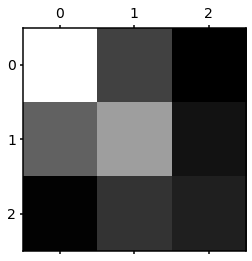

In [33]:
confMx = confusionMatrix.values[0:3,0:3]
plt.matshow(confMx, cmap=plt.cm.gray)
plt.show()

An ideal confusion matrix should have a bright diagonal line, since the diagonals count the number of samples that were classified correctly. Although be aware that the colors correspond to the absolute number of instances, instead of a percentage. Therefore a unit can be darker just because there are less samples for that class. To understand what kind of errors the predictor make, we will divide the values in the confusion matrix by the total number of samples in each class:

In [34]:
rowSums = confMx.sum(axis=1, keepdims=True) # contains number of samples for each true class
confMxNorm = confMx/rowSums

Since we only care about errors, let's fill the diagnoal elements with zero, then visualize the matrix:

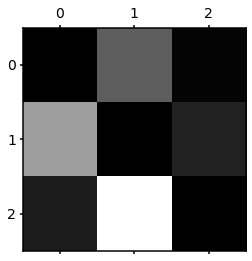

In [35]:
np.fill_diagonal(confMxNorm, 0)
plt.matshow(confMxNorm, cmap=plt.cm.gray)
plt.show()

We can see a bright square at $C^{norm}_{21}$ (0 indexing). This means class 2 is heavily misclassified as class 1. In fact, out of 217 samples of true class 2, 124 samples were predicted to be class 1. This provides information on how you should further improve the model.

ROC curves are typically used for binary classification, but can be extended to multiclass classification. Some of the techniques include **one-versus-all binarization, micro-averaging, and macro-averaging**. Depending on what question you are asking, different methods should be chosen. A quick tutorial from scikit-learn with python source code is provided here: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html.

A side note: here we ran logistic regression and softmax regression on the whole given dataset. In real application, you are usually given a train dataset and a test dataset, and the latter is usually not part of your model training. You can further divide the train dataset into train and validation set, where you train the model on the train set and observe its performance on validation set. The goal is to select the model that performs best on the validation set, and use it on the final test set.